In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde el archivo CSV
data = pd.read_csv("Zernike.csv")

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop("etiqueta", axis=1)  # Características
y = data["etiqueta"]  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train_scaled)
print(X_train_scaled.shape)

(2560, 25)


In [12]:
learning_rate = 0.1  # Tasa de aprendizaje
momentum = 0.7  # Momentum
hidden_layers = (3, 15)  # Número de capas ocultas y número de neuronas en cada capa
activation_function = 'logistic'  # Función de activación (sigmoide)
tolerance = 1e-4 # Parámetro de tolerancia

# Crear el clasificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layers,
                               activation=activation_function,
                               learning_rate_init=learning_rate,
                               momentum=momentum,
                               max_iter=1000,
                               tol=tolerance,
                               random_state=42,
                               verbose=True)

# validation_fraction=0.1,

# Entrenar el clasificador
history = mlp_classifier.fit(X_train_scaled, y_train)

Iteration 1, loss = 1.25772136
Iteration 2, loss = 1.13315628
Iteration 3, loss = 1.11336261
Iteration 4, loss = 1.11373671
Iteration 5, loss = 1.10538261
Iteration 6, loss = 1.10389410
Iteration 7, loss = 1.10546647
Iteration 8, loss = 1.10164480
Iteration 9, loss = 1.09997476
Iteration 10, loss = 1.10324014
Iteration 11, loss = 1.09957393
Iteration 12, loss = 1.09759611
Iteration 13, loss = 1.09595172
Iteration 14, loss = 1.09572376
Iteration 15, loss = 1.09373352
Iteration 16, loss = 1.09428539
Iteration 17, loss = 1.09305629
Iteration 18, loss = 1.09758002
Iteration 19, loss = 1.09295012
Iteration 20, loss = 1.09315825
Iteration 21, loss = 1.09251278
Iteration 22, loss = 1.09548179
Iteration 23, loss = 1.08949302
Iteration 24, loss = 1.09317855
Iteration 25, loss = 1.09142288
Iteration 26, loss = 1.08535577
Iteration 27, loss = 1.08892725
Iteration 28, loss = 1.08560654
Iteration 29, loss = 1.08266491
Iteration 30, loss = 1.08742180
Iteration 31, loss = 1.08571103
Iteration 32, los

In [13]:
# Evaluar el modelo
train_accuracy = mlp_classifier.score(X_train_scaled, y_train)
test_accuracy = mlp_classifier.score(X_test_scaled, y_test)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

Precisión en el conjunto de entrenamiento: 0.543359375
Precisión en el conjunto de prueba: 0.5078125


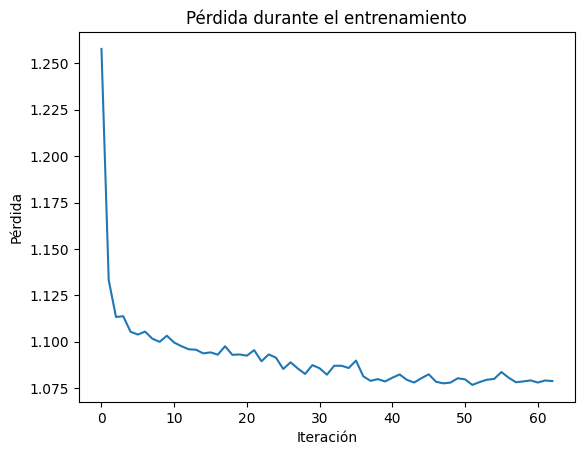

In [14]:
# Obtener la pérdida de cada iteración
loss_curve = mlp_classifier.loss_curve_

# Graficar la pérdida de cada iteración
plt.plot(loss_curve)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()